# Load a LSM file of hyperspectral data and compute its phasor plot

## Install libraries

In [1]:
!pip install phasorpy

## Load Libraries

In [2]:
from phasorpy.io import read_lsm
from phasorpy.plot import plot_signal_image
from phasorpy.phasor import phasor_from_signal, phasor_threshold
import matplotlib.pyplot as plt
from phasorpy.plot import PhasorPlot
import numpy as np 

## Paths and Parameters

In [3]:
#file_path = '/home/jovyan/LNMA/vazquezd/data/20240917_CAP_M1_R1.lsm'
file_path = '/home/jovyan/LNMA/vazquezd/data/20240917_NC_M1_R1.lsm'

## Load data

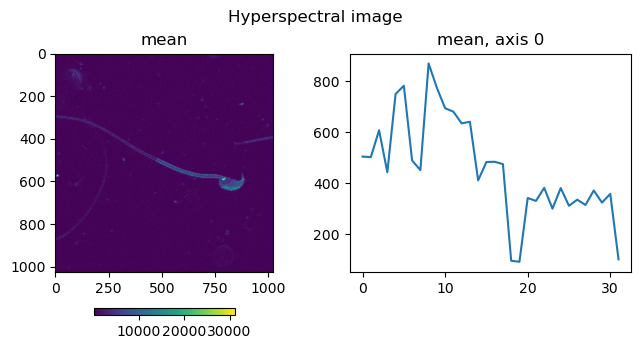

In [4]:
signal = read_lsm(file_path)
plotty = True
if plotty:
  plot_signal_image(signal, axis=0, title='Hyperspectral image')

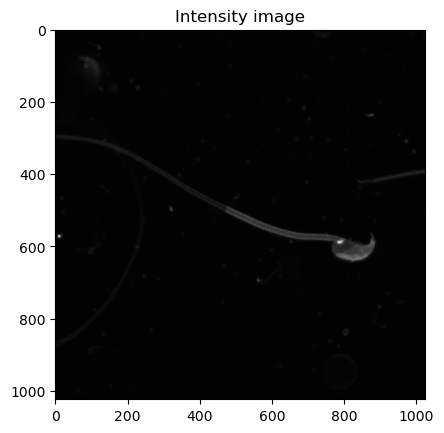

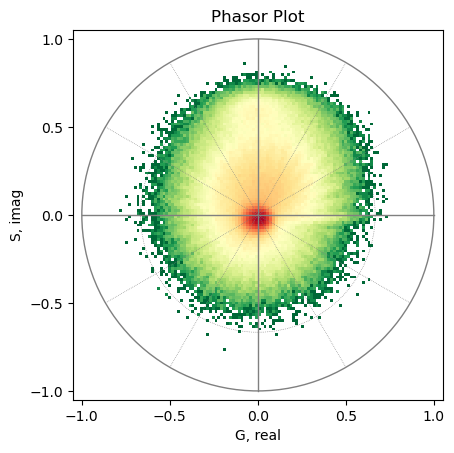

In [5]:
mean, real, imag = phasor_from_signal(signal, axis=0)

plotty = True
if plotty:
  plt.figure()
  plt.imshow(mean, cmap="gray")
  plt.title("Intensity image")

  plot = PhasorPlot(allquadrants=True, title='Phasor Plot')
  plot.hist2d(real, imag, cmap='RdYlGn_r')

## remove coordinates with zero intensity

In [6]:
mean_thresholded, real, imag = phasor_threshold(
    mean, real, imag, mean_min=1700)

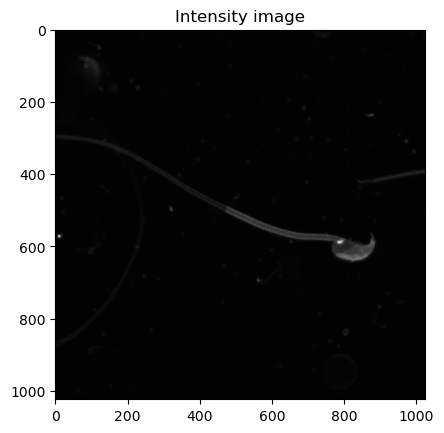

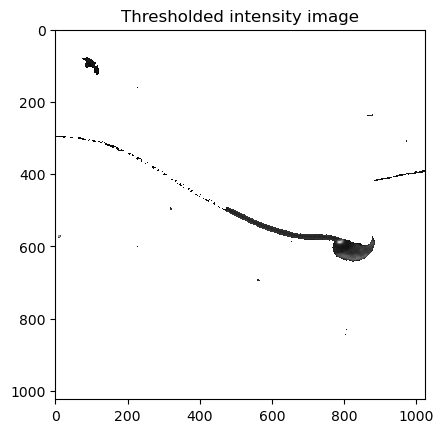

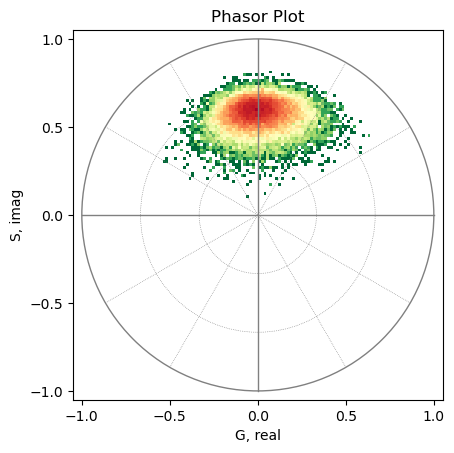

In [7]:
plotty = True
if plotty:
  plt.figure()
  plt.imshow(mean, cmap="gray")
  plt.title("Intensity image")

  plt.figure()
  plt.imshow(mean_thresholded, cmap="gray")
  plt.title("Thresholded intensity image")

  plot = PhasorPlot(allquadrants=True, title='Phasor Plot')
  plot.hist2d(real, imag, cmap='RdYlGn_r')

In [8]:
real_m = round(np.nanmedian(real), 2)
imag_m = round(np.nanmedian(imag), 2)
print("Median of real array:", real_m)
print("Median of imag array:", imag_m)

Median of real array: -0.0
Median of imag array: 0.58
